In [1119]:
import pandas as pd

In [1120]:
auction=pd.read_csv("auction.csv")
auction.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


In [1121]:
auction = auction[['auctionid','bidder','bid'] ]

In [1122]:


# selecting rows based on condition 
rslt= auction[auction['auctionid']  == 8214772603] 
rslt = rslt[['bidder','bid']]
   
print('\nResult dataframe :\n', rslt)



Result dataframe :
                   bidder     bid
10483            jmezzan    7.00
10484      blackstep2005    1.50
10485            aresmom   25.00
10486            newbay7   31.99
10487            aresmom   35.00
10488            newbay7   41.99
10489           whalers9   77.77
10490            newbay7   45.99
10491            newbay7   51.99
10492           serdna01   54.00
10493            newbay7   61.99
10494            newbay7   65.99
10495        skatastic57   75.00
10496        skatastic57   80.00
10497  bharat_choudary81   85.00
10498           braysbae   87.00
10499           braysbae   90.00
10500           braysbae   92.00
10501         mrsbeck123   90.00
10502         mrsbeck123   92.00
10503         mrsbeck123   95.00
10504       craftyseadog  100.00
10505         mrsbeck123   97.00
10506         mrsbeck123   99.00
10507         mrsbeck123  102.50
10508  bharat_choudary81  105.00
10509          russbetty  107.50
10510  bharat_choudary81  110.00
10511         mrsbeck1

In [1123]:
t = rslt.groupby('bidder').filter(lambda x : len(x) >= 1)
h = rslt.groupby('bidder')


In [1124]:
t

,bidder,bid
10483,jmezzan,7.00
10484,blackstep2005,1.50
10485,aresmom,25.00
10486,newbay7,31.99
10487,aresmom,35.00
10488,newbay7,41.99
10489,whalers9,77.77
10490,newbay7,45.99
10491,newbay7,51.99
10492,serdna01,54.00


In [1125]:
m = (t.bidder).tolist()
m = set(m)
bidderNameList= list(m)

In [1126]:
bidderNameList

['oklahoma4x4',
 'aresmom',
 'mrsbeck123',
 'nalinprabhu',
 'jmezzan',
 'serdna01',
 'skatastic57',
 'russbetty',
 'blackstep2005',
 'newbay7',
 'craftyseadog',
 'bharat_choudary81',
 'braysbae',
 'whalers9']

In [1127]:
matrixOfBidder = []

In [1128]:
for i in range(len(bidderNameList)):
    m = h.get_group(bidderNameList[i])
    price = []
    for index,rows in m.iterrows():
        price.append(rows[1])
    matrixOfBidder.append(price)


/tmp/ipykernel_21647/3196034299.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price.append(rows[1])


In [1129]:
matrixOfBidder

[[130.0, 135.0, 140.0, 142.5],
 [25.0, 35.0],
 [90.0, 92.0, 95.0, 97.0, 99.0, 102.5, 125.0],
 [140.0],
 [7.0],
 [54.0],
 [75.0, 80.0],
 [107.5],
 [1.5],
 [31.99, 41.99, 45.99, 51.99, 61.99, 65.99],
 [100.0],
 [85.0, 105.0, 110.0, 115.0],
 [87.0, 90.0, 92.0],
 [77.77]]

In [1130]:
import math
reservePrice = 142.5
predictedPriceMatrix = []
exceedingRoundMatrix = []
def bidRevisonCost(initFee,limitFactor):
    global predictedPriceMatrix, exceedingRoundMatrix
    for i in range(len(matrixOfBidder)):
        maxVal = max(matrixOfBidder[i])
        index = 0
        pastFee = 0
        payList = []
        for k in range(1,math.ceil(maxVal)):
            Newfee = initFee *( limitFactor ** (k-1))
            pastFee = pastFee + Newfee
            payAmout = matrixOfBidder[i][k-1] + pastFee
            payList.append(payAmout)
            if payAmout >= maxVal:
                index = k
                break 
            
        exceedingRoundMatrix.append(index)       

        predictedPriceMatrix.append(payList)

    
    
bidRevisonCost(1,4)
print(predictedPriceMatrix)
exceedingRoundMatrix

[[131.0, 140.0, 161.0], [26.0, 40.0], [91.0, 97.0, 116.0, 182.0], [141.0], [8.0], [55.0], [76.0, 85.0], [108.5], [2.5], [32.989999999999995, 46.99, 66.99000000000001], [101.0], [86.0, 110.0, 131.0], [88.0, 95.0], [78.77]]


[3, 2, 4, 1, 1, 1, 2, 1, 1, 3, 1, 3, 2, 1]

In [1131]:
# exceedingRoundMatrix = []
# def functionToCheckPrecendence():
#     global predictedPricematrix, matrixOfBidder,exceedingRoundMatrix
#     for i in range(len(matrixOfBidder)):
#         m = max(matrixOfBidder[i])
#         # print(m)
#         res = [idx for idx, val in enumerate(predictedPriceMatrix) if m < val]
#         # print(res[0]+1)
#         exceedingRoundMatrix.append(res[0]+1)

# # functionToCheckPrecendence()

In [1132]:
import matplotlib.pyplot as plt
import numpy as np

a = 1
bidRevisionList = [[a,1],[a,2],[a,3],[a,4],[0,5]]

precedencelistMatrix = []


for i in range(len(bidRevisionList)):
    exceedingRoundMatrix = []
    predictedPriceMatrix = []
    bidRevisonCost(bidRevisionList[i][0],bidRevisionList[i][1])
    precedencelistMatrix.append(exceedingRoundMatrix)
    
precedencelistMatrix
    

[[3, 2, 7, 1, 1, 1, 2, 1, 1, 5, 1, 4, 2, 1],
 [3, 2, 5, 1, 1, 1, 2, 1, 1, 4, 1, 3, 2, 1],
 [3, 2, 4, 1, 1, 1, 2, 1, 1, 4, 1, 3, 2, 1],
 [3, 2, 4, 1, 1, 1, 2, 1, 1, 3, 1, 3, 2, 1],
 [4, 2, 7, 1, 1, 1, 2, 1, 1, 6, 1, 4, 3, 1]]

In [1133]:
colorList = ['r','g','m','y']
# set width of bar 
barWidth = 0.9
# fig = plt.subplots(figsize =(12, 8)) 
barPos = np.arange(len(bidRevisionList))
#     plt.bar(bidderNameList, exceedingRoundMatrix, color = colorList[i])
#     plt.legend(bidRevisionList)
# plt.show()

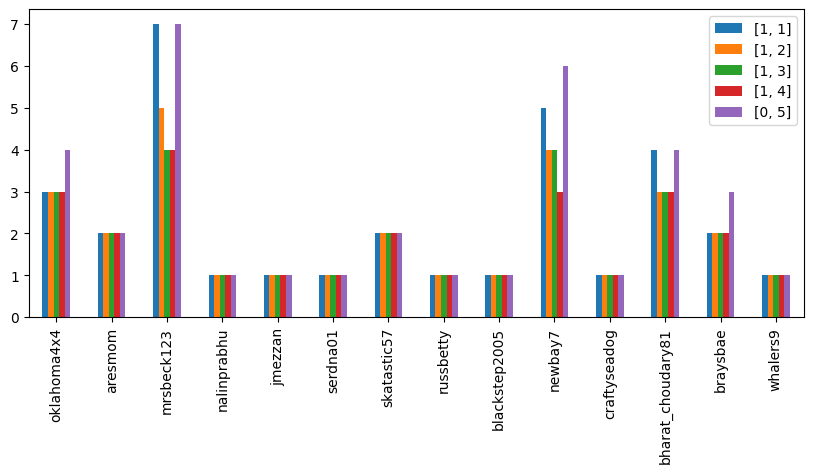

In [1134]:
# Library Import(numpy and matplotlib)
import matplotlib.pyplot as plot
import pandas as pd
# Make a data definition
_data = { str(bidRevisionList[0]) : precedencelistMatrix[0],
         str(bidRevisionList[1]) : precedencelistMatrix[1],
         str(bidRevisionList[2]) : precedencelistMatrix[2],
         str(bidRevisionList[3]) : precedencelistMatrix[3],
         str(bidRevisionList[4]) : precedencelistMatrix[4]}
_df = pd.DataFrame(_data, index = bidderNameList)
 
# Multiple horizontal bar chart
_df.plot.bar(figsize= (10,4))

# Display the plot
plot.show()
